# Project 2: Service request data analysis of New York City 311 calls

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import scipy.stats as stats

# 1. Import a 311 NYC service request

In [2]:
# Load the data set using pandas
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

In [3]:
# View the top 5 elements of the data set
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# Shape of the dataset
df.shape

(300698, 53)

In [5]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
# Viewing the columns
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

- Dropping the columns with very large number of null values
- Dropping the unnecessary columns

In [7]:
drop_columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

df=df.drop(drop_columns,axis=1)

In [8]:
# Shape of dataset
df.shape

(300698, 14)

In [9]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              300698 non-null  int64  
 1   Created Date            300698 non-null  object 
 2   Closed Date             298534 non-null  object 
 3   Agency                  300698 non-null  object 
 4   Complaint Type          300698 non-null  object 
 5   Descriptor              294784 non-null  object 
 6   Location Type           300567 non-null  object 
 7   Incident Zip            298083 non-null  float64
 8   City                    298084 non-null  object 
 9   Status                  300698 non-null  object 
 10  Resolution Description  300698 non-null  object 
 11  Borough                 300698 non-null  object 
 12  Latitude                297158 non-null  float64
 13  Longitude               297158 non-null  float64
dtypes: float64(3), int64

In [10]:
# Number of null values in the columns
df.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
dtype: int64

In [11]:
# Closed cases only to eliminate the null values
df=df[df['Status']=='Closed']

In [12]:
df.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date                  0
Agency                       0
Complaint Type               0
Descriptor                5903
Location Type               65
Incident Zip               507
City                       506
Status                       0
Resolution Description       0
Borough                      0
Latitude                  1432
Longitude                 1432
dtype: int64

In [13]:
# All the cases are of closed cases, now drop the column Status as every value of its data are same
df=df.drop(['Status'], axis=1)

In [14]:
df.shape

(298471, 13)

In [15]:
# Remove the remaining null values
df=df[(df['Descriptor'].notnull()) & (df['Latitude'].notnull()) &(df['Longitude'].notnull()) & (df['Location Type'].notnull()) & (df['Incident Zip'].notnull()) &(df['City'].notnull())]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291107 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291107 non-null  int64  
 1   Created Date            291107 non-null  object 
 2   Closed Date             291107 non-null  object 
 3   Agency                  291107 non-null  object 
 4   Complaint Type          291107 non-null  object 
 5   Descriptor              291107 non-null  object 
 6   Location Type           291107 non-null  object 
 7   Incident Zip            291107 non-null  float64
 8   City                    291107 non-null  object 
 9   Resolution Description  291107 non-null  object 
 10  Borough                 291107 non-null  object 
 11  Latitude                291107 non-null  float64
 12  Longitude               291107 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 31.1+ MB


In [16]:
# Rechecking the null values
df.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

- All null values are removed from the dataset

In [17]:
# Shape of the data set now
df.shape

(291107, 13)

# 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [18]:
# 'Created Date'to datetime datatype
df['Created Date']=pd.to_datetime(df['Created Date'])

In [19]:
# 'Closed Date' to datetime datatype

In [20]:
df['Closed Date']=pd.to_datetime(df['Closed Date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291107 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              291107 non-null  int64         
 1   Created Date            291107 non-null  datetime64[ns]
 2   Closed Date             291107 non-null  datetime64[ns]
 3   Agency                  291107 non-null  object        
 4   Complaint Type          291107 non-null  object        
 5   Descriptor              291107 non-null  object        
 6   Location Type           291107 non-null  object        
 7   Incident Zip            291107 non-null  float64       
 8   City                    291107 non-null  object        
 9   Resolution Description  291107 non-null  object        
 10  Borough                 291107 non-null  object        
 11  Latitude                291107 non-null  float64       
 12  Longitude               291107

In [22]:
# Create 'Request_Closing_Time' Column
df['Request_Closing_Time'] = df['Closed Date']-df['Created Date']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291107 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291107 non-null  int64          
 1   Created Date            291107 non-null  datetime64[ns] 
 2   Closed Date             291107 non-null  datetime64[ns] 
 3   Agency                  291107 non-null  object         
 4   Complaint Type          291107 non-null  object         
 5   Descriptor              291107 non-null  object         
 6   Location Type           291107 non-null  object         
 7   Incident Zip            291107 non-null  float64        
 8   City                    291107 non-null  object         
 9   Resolution Description  291107 non-null  object         
 10  Borough                 291107 non-null  object         
 11  Latitude                291107 non-null  float64        
 12  Longitude       

In [23]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02


# 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [24]:
# Describe the dataset
df.describe()

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,2.911070e+05,291107.000000,291107.000000,291107.000000,291107
mean,3.130158e+07,10857.977349,40.725681,-73.925035,0 days 04:18:32.132665995
std,5.753777e+05,580.280774,0.082411,0.078654,0 days 06:03:45.509089128
min,3.027948e+07,83.000000,40.499135,-74.254937,0 days 00:01:00
25%,3.079934e+07,10314.000000,40.668926,-73.970957,0 days 01:16:30
50%,3.130675e+07,11209.000000,40.717782,-73.930774,0 days 02:42:38
75%,3.179091e+07,11238.000000,40.782973,-73.875788,0 days 05:20:24
max,3.231065e+07,11697.000000,40.912869,-73.700760,24 days 16:52:22


In [25]:
# Viewing the columns
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

## Analysing Agency, Complaint Type, Descriptor, Location Type, City, Borough 

In [26]:
# All the complaints are under the same agency
df['Agency'].value_counts()

NYPD    291107
Name: Agency, dtype: int64

#### 1. Agency Complaint Types

In [27]:
df['Complaint Type'].value_counts()

Blocked Driveway            76676
Illegal Parking             74021
Noise - Street/Sidewalk     47747
Noise - Commercial          35144
Derelict Vehicle            17506
Noise - Vehicle             16868
Animal Abuse                 7744
Traffic                      4466
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: Complaint Type, dtype: int64

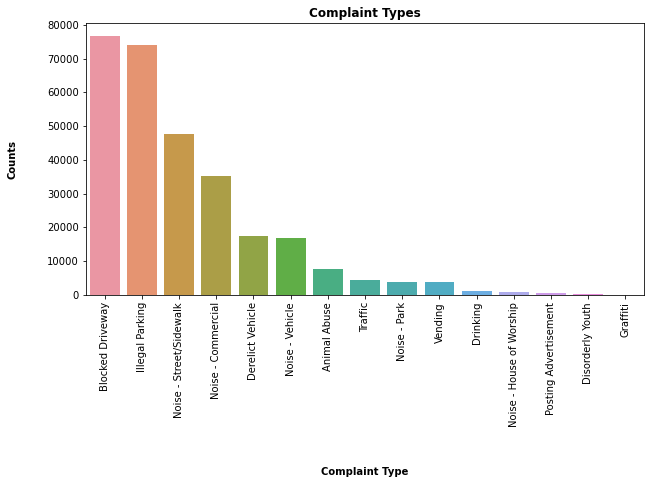

In [28]:
# Plotting the complaint types
df['City'] = df['City'].str.lower().str.replace(" ","_")
txt={'weight':'bold'}
plt.figure(figsize=(10,5))
sns.countplot(x='Complaint Type',data=df,order=df['Complaint Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Complaint Types",fontdict=txt)
plt.xlabel('Complaint Type',fontdict=txt,labelpad=40)
plt.ylabel('Counts',fontdict=txt,labelpad=30)
plt.show()


### Conclusion 1
#### Blocked Driveway is the Maximum Complaint type followed by Illegal Parking, Noise-Street/Sidewalk, Noise-Commercial

### 2. Top 10 Descriptors

In [29]:
# Descriptors
df['Descriptor'].value_counts()

Loud Music/Party                  60444
No Access                         56725
Posted Parking Sign Violation     22103
Loud Talking                      21254
Partial Access                    19951
With License Plate                17506
Blocked Hydrant                   15837
Commercial Overnight Parking      11908
Car/Truck Music                   11114
Blocked Sidewalk                  10930
Double Parked Blocking Traffic     5558
Double Parked Blocking Vehicle     4147
Engine Idling                      4134
Banging/Pounding                   4090
Neglected                          3771
Car/Truck Horn                     3477
Congestion/Gridlock                2736
In Prohibited Area                 2017
Other (complaint details)          1961
Unlicensed                         1756
Overnight Commercial Storage       1746
Unauthorized Bus Layover           1333
Truck Route Violation              1010
In Public                           923
Tortured                            849


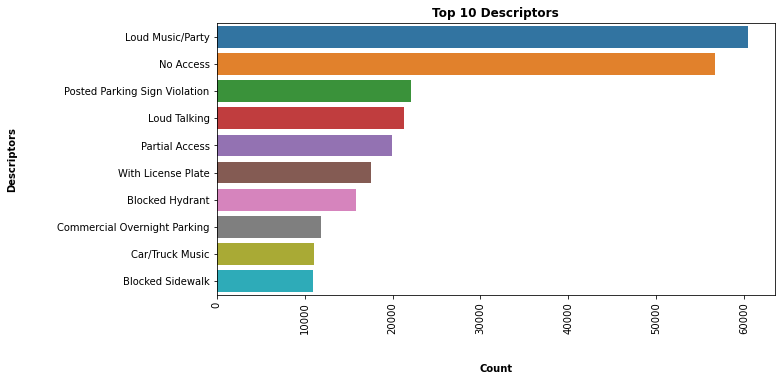

In [30]:
# Plotting top 10 descriptors
df['City'] = df['City'].str.lower().str.replace(" ","_")
txt={'weight':'bold'}
plt.figure(figsize=(10,5))
sns.countplot(y='Descriptor',data=df,order=df['Descriptor'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.title("Top 10 Descriptors",fontdict=txt)
plt.ylabel('Descriptors',fontdict=txt,labelpad=40)
plt.xlabel('Count',fontdict=txt,labelpad=30)
plt.show()

### Conclusion 2
#### Loud Music/Party is the descriptor for the complaints followed by No Access, Posted Parking Sign Violation and Loud Taking.

### 3. Top 5 Location type

In [31]:
# Location Type
df['Location Type'].value_counts()

Street/Sidewalk               242765
Store/Commercial               19425
Club/Bar/Restaurant            17172
Residential Building/House      5753
Park/Playground                 4246
House of Worship                 920
Residential Building             226
Highway                          196
Parking Lot                      116
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    34
Subway Station                    22
Name: Location Type, dtype: int64

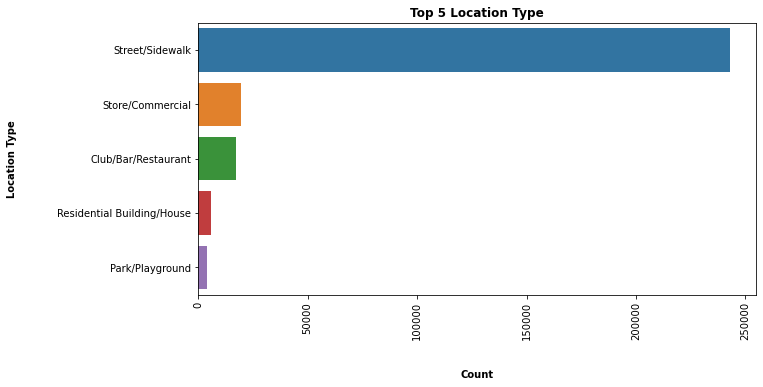

In [32]:
# Plotting Top 5 Location Type
df['City'] = df['City'].str.lower().str.replace(" ","_")
txt={'weight':'bold'}
plt.figure(figsize=(10,5))
sns.countplot(y='Location Type',data=df,order=df['Location Type'].value_counts().head(5).index)
plt.xticks(rotation=90)
plt.title("Top 5 Location Type",fontdict=txt)
plt.ylabel('Location Type',fontdict=txt,labelpad=40)
plt.xlabel('Count',fontdict=txt,labelpad=30)
plt.show()


### Conclusion 3
#### The Location Type of Street/Sidewalk is a lot more than any other members of its category

### 4. Top 10 City wise complaints

In [33]:
# City
df['City'].value_counts()

brooklyn               96858
new_york               61935
bronx                  40216
staten_island          12211
jamaica                 7155
astoria                 6970
flushing                5916
ridgewood               5124
corona                  4265
woodside                3613
south_richmond_hill     2759
east_elmhurst           2738
ozone_park              2733
elmhurst                2624
long_island_city        2542
woodhaven               2448
maspeth                 2445
south_ozone_park        2165
fresh_meadows           1886
richmond_hill           1865
queens_village          1788
middle_village          1759
jackson_heights         1671
forest_hills            1655
rego_park               1477
college_point           1216
bayside                 1214
far_rockaway            1163
whitestone              1093
hollis                   998
howard_beach             922
rosedale                 913
springfield_gardens      871
saint_albans             825
kew_gardens   

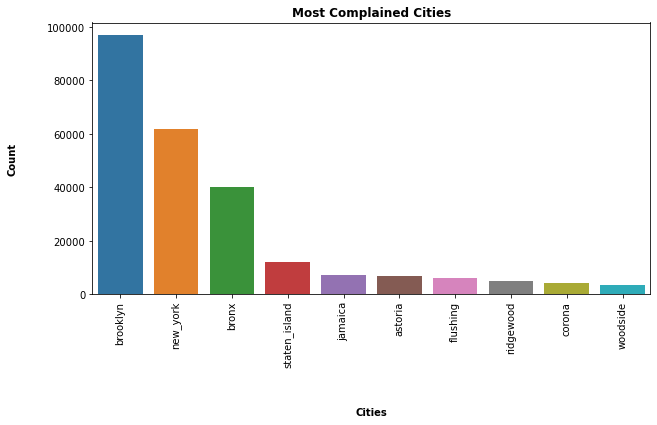

In [34]:
# Plotting the cities
df['City'] = df['City'].str.lower().str.replace(" ","_")
txt={'weight':'bold'}
plt.figure(figsize=(10,5))
sns.countplot(x='City',data=df,order=df['City'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.title("Most Complained Cities",fontdict=txt)
plt.xlabel('Cities',fontdict=txt,labelpad=40)
plt.ylabel('Count',fontdict=txt,labelpad=30)
plt.show()

### Conclusion 4
#### Most complaints are from Brooklyn followed New York, Bronx, Staten Island in City wise

### 5. Borough wise Complaints

In [35]:
# Borough wise complaints
df['Borough'].value_counts()

BROOKLYN         96858
QUEENS           79790
MANHATTAN        62033
BRONX            40217
STATEN ISLAND    12209
Name: Borough, dtype: int64

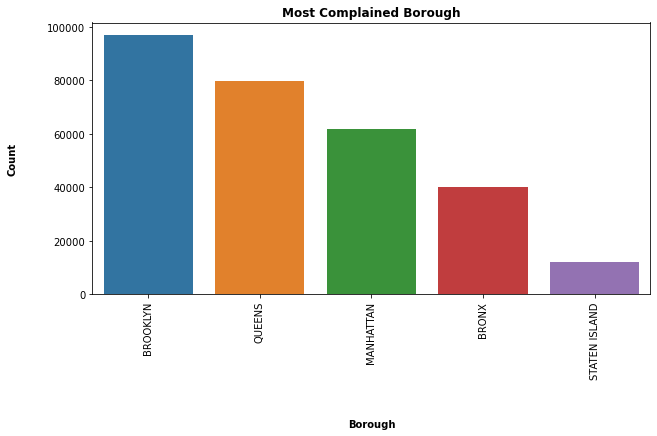

In [36]:
# Plotting Borough wise complaints
df['City'] = df['City'].str.lower().str.replace(" ","_")
txt={'weight':'bold'}
plt.figure(figsize=(10,5))
sns.countplot(x='Borough',data=df,order=df['Borough'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Most Complained Borough",fontdict=txt)
plt.xlabel('Borough',fontdict=txt,labelpad=40)
plt.ylabel('Count',fontdict=txt,labelpad=30)
plt.show()

### Conclusion 5
####  Most complaints are from Brooklyn followed Queens, Manhattan, Bronx and Staten Island in Borough wise

# 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [57]:
# Creating a column Request_Closing_Time_in_Hours for time in Hours
# Complaint has been closed under x hours
df['Request_Closing_Time_in_Hours'] = df['Request_Closing_Time'].astype('timedelta64[h]')+1

# viewing the Two columns side by side for first 20 entries
df[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(20)

,Request_Closing_Time,Request_Closing_Time_in_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0
5,0 days 01:53:30,2.0
6,0 days 01:57:28,2.0
7,0 days 01:47:55,2.0
8,0 days 08:33:02,9.0
9,0 days 01:23:02,2.0


In [58]:
#  Ordering the complaint types based on the average ‘Request_Closing_Time’ in Hours, grouping them for different locations.
data_avg_time_in_hrs = df.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()
data_avg_time_in_hrs.head(10)

City     Complaint Type          
arverne  Animal Abuse                2.631579
         Blocked Driveway            3.028571
         Derelict Vehicle            3.407407
         Disorderly Youth            4.000000
         Drinking                    1.000000
         Graffiti                    2.000000
         Illegal Parking             2.827586
         Noise - Commercial          3.000000
         Noise - House of Worship    2.090909
         Noise - Park                1.500000
Name: Request_Closing_Time_in_Hours, dtype: float64

In [59]:
# Creating a column Request_Closing_Time_in_Seconds for time in seconds
df['Request_Closing_Time_in_Seconds'] = df['Request_Closing_Time'].astype('timedelta64[s]')

# Viewing the Three columns side by side
df[['Request_Closing_Time', 'Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds']].head()

,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds
0,0 days 00:55:15,1.0,3315.0
1,0 days 01:26:16,2.0,5176.0
2,0 days 04:51:31,5.0,17491.0
3,0 days 07:45:14,8.0,27914.0
4,0 days 03:27:02,4.0,12422.0


In [60]:
# Order the complaint types based on the average ‘Request_Closing_Time’ in seconds, grouping them for different locations.
data_avg_in_seconds = df.groupby(['City', 'Complaint Type']).Request_Closing_Time_in_Seconds.mean()
data_avg_in_seconds.head(10)

City     Complaint Type          
arverne  Animal Abuse                 7753.052632
         Blocked Driveway             9093.485714
         Derelict Vehicle            10685.592593
         Disorderly Youth            12928.500000
         Drinking                      859.000000
         Graffiti                     5520.000000
         Illegal Parking              8338.913793
         Noise - Commercial           8234.000000
         Noise - House of Worship     5623.909091
         Noise - Park                 4620.000000
Name: Request_Closing_Time_in_Seconds, dtype: float64

In [61]:
# Analyse the Request_Closing_Time
df['Request_Closing_Time'].describe()

count                       291107
mean     0 days 04:18:32.132665995
std      0 days 06:03:45.509089128
min                0 days 00:01:00
25%                0 days 01:16:30
50%                0 days 02:42:38
75%                0 days 05:20:24
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [63]:
# Taking the mean and Standard
mean_hrs = df['Request_Closing_Time_in_Hours'].mean()
std_hrs = df['Request_Closing_Time_in_Hours'].std()

mean_seconds = df['Request_Closing_Time_in_Seconds'].mean()
std_seconds = df['Request_Closing_Time_in_Seconds'].std()

print('The mean hours is {0:.2f} hours and mean Seconds is {1:.2f} seconds'.format(mean_hrs, mean_seconds))
print('The standard hours is {0:.2f} hours and standard Seconds is {1:.2f} seconds'.format(std_hrs, std_seconds))

The mean hours is 4.82 hours and mean Seconds is 15512.13 seconds
The standard hours is 6.06 hours and standard Seconds is 21825.51 seconds


### Complaint Types column on the basis of 'Months' by refering to 'Created Date'

In [67]:
# Analysing on the basis of month, need to separate months from Created Date column
df['Year-Month'] = df['Created Date'].apply(lambda x:datetime.datetime.strftime(x, '%Y-%m'))
df['Year-Month'].unique()

array(['2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07',
       '2015-06', '2015-05', '2015-04', '2015-03'], dtype=object)

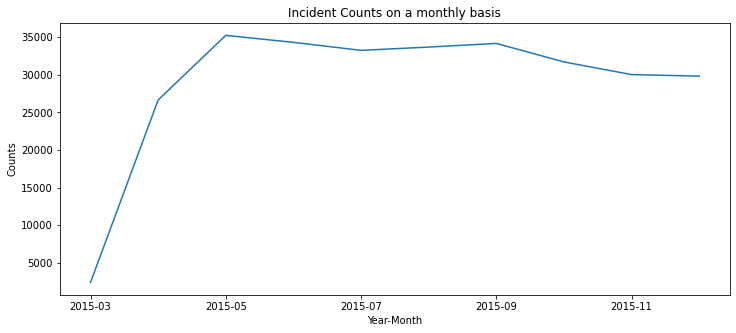

In [68]:
# Plotting the month column
monthly_incidents =  df.groupby('Year-Month').size().plot(figsize=(12,5),title='Incident Counts on a monthly basis', ylabel='Counts')

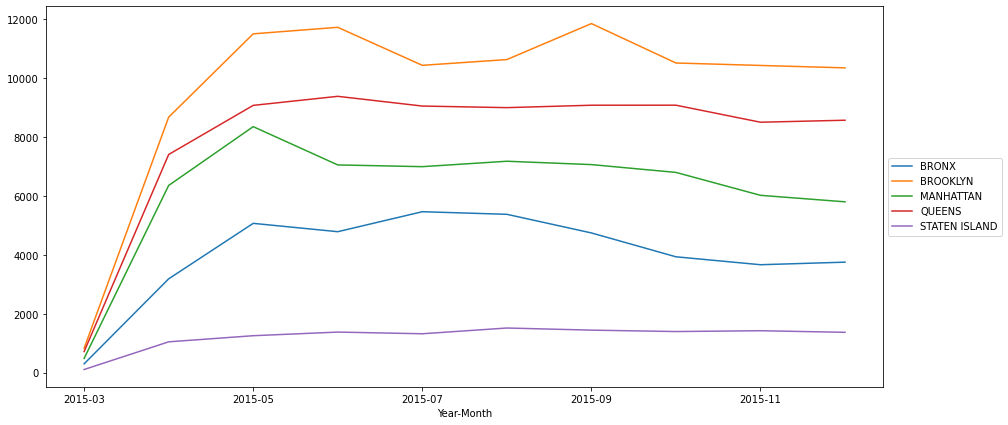

In [70]:
# Plotting Borough on the basis of Year-Month
df.groupby(['Year-Month','Borough']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

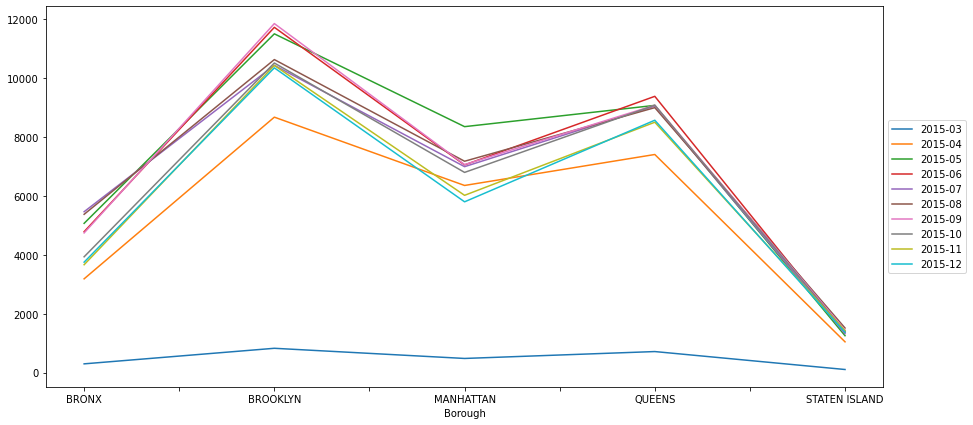

In [73]:
# Plotting Year-Month on the basis of Borough
df.groupby(['Borough', 'Year-Month']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

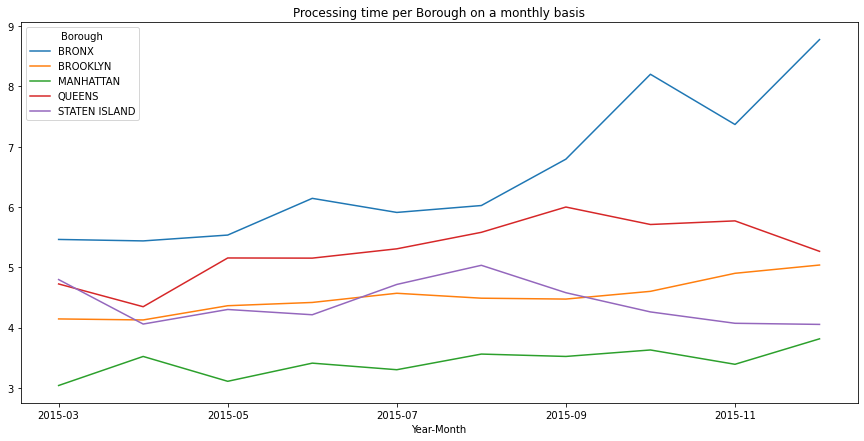

In [75]:
# Processing time per Borough on a monthly basis
df.groupby(['Year-Month','Borough'])['Request_Closing_Time_in_Hours'].mean().unstack().plot(figsize=(15,7),title='Processing time per Borough on a monthly basis');

# 5. Perform a statistical test for the following:

### Please note: 
For the below statements you need to state the Null and Alternate and then    provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

- Whether the average response time across complaint types is similar or not (overall)
- Are the type of complaint or service requested and location related?

In [76]:
# Viewing the columns
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Request_Closing_Time_in_Hours',
       'Request_Closing_Time_in_Seconds', 'Year-Month'],
      dtype='object')

In [77]:
# The average response time in seconds for different complaint types
avg_response_time = df.groupby(['Complaint Type']).Request_Closing_Time_in_Seconds.mean().sort_values(ascending=True)
avg_response_time

Complaint Type
Posting Advertisement        7113.582689
Noise - Commercial          11294.078335
Noise - House of Worship    11519.116304
Noise - Park                12249.610644
Noise - Street/Sidewalk     12392.210610
Traffic                     12426.186968
Disorderly Youth            12847.733333
Noise - Vehicle             12953.606711
Drinking                    13885.939370
Vending                     14442.301617
Illegal Parking             16140.427217
Blocked Driveway            17056.511751
Animal Abuse                18786.728951
Graffiti                    25744.504425
Derelict Vehicle            26450.507426
Name: Request_Closing_Time_in_Seconds, dtype: float64

- <b>Null Hypothesis : Average response time across complaint types is similar (overall).
- <b>Alternate Hypothesis : Average response time across complaint types is not similar(overall).

#### We can say that for overall case our <b>NULL HYPOTHESIS</b> is rejected as the Average Response Time in Seconds for different complaint types is different

# Testing for our Hypothesis

- Below We conduct ANOVA (Analysis of Variance) test for top 5 type of complaints

- For a 95% of confidence interval we choose our alpha as 0.05 for 5%

- Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.
>
- <b>if p < alpha(0.05) <b>: Reject Null Hypothesis, Average response time for all the complaints type is not same.</b>

- <b>if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.</b>

In [79]:
# Calculate the p-value log of time taken to close the complaint per complaint is taken
data = {}
for complaint in df['Complaint Type'].unique():
    data[complaint] = np.log(df[df['Complaint Type']==complaint]['Request_Closing_Time_in_Seconds'])

In [80]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [81]:
for complaint in data.keys():
    print(data[complaint].std())

1.1029853481161118
0.9759835331364468
1.07759350645833
1.2579717580716774
1.0889851891911977
1.1764769203426566
1.2223658746794284
1.0766368282265082
1.0439938309706467
1.1124255292109804
1.183766057955533
1.0462752311468753
1.119443436237754
1.0644915295126962
1.0383245818152775


In [89]:
# importing f_oneway from scipy.stats library
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import f_oneway
# taking top 5 complaints
stat, p = f_oneway(data['Blocked Driveway'], data['Illegal Parking'], data['Noise - Street/Sidewalk'],
                   data['Derelict Vehicle'], data['Noise - Commercial'])
print('Statistics= %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have Different distributions (reject H0)')

Statistics= 2452.471, p = 0.000
We have Different distributions (reject H0)


- <b>As our p-value is quite low , hence it is being converted to 0.0</b>

- Since our p-value is lower than our critical p-value, we will conclude that we have enough evidence to reject our Null Hypothesis and that is:

- Average response time for all the complaints type is not same.

### For relation between Complaint Type and Location
Crosstab and Chi-square Test

In [85]:
# getting crosstab from pandas
city_type = pd.crosstab(df['City'], df['Complaint Type'])
city_type.head()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
arverne,38,35,27,2,1,1,58,2,11,2,29,7,0,0,1
astoria,125,2734,363,3,35,4,1278,1543,19,61,499,204,1,47,54
bayside,37,376,198,1,1,3,511,40,2,3,15,16,0,9,2
bellerose,7,95,89,2,1,0,105,37,1,1,13,10,1,7,0
breezy_point,2,3,3,0,1,0,15,4,0,0,1,1,0,0,0


In [90]:
# Chi-square Test
# table -->> The contingency table. The table contains the observed frequencies (i.e. number of occurrences) in each category.
# stat -->> chi2 or Test Statistic
# p -->> The p-value of the Test
# dof -->> Degrees of Freedom
# expected -->> The expected frequencies, based on the marginal sums of the table.
table = city_type 
stat, p, dof, expected = chi2_contingency(table)

In [91]:
print('The Degrees of Freedom are : {}'. format(dof))
print('The P-Value of the Testing is {}: '.format(p))
print('Expected values : \n')
print(expected)

The Degrees of Freedom are : 658
The P-Value of the Testing is 0.0: 
Expected values : 

[[5.69280711e+00 5.63664357e+01 1.28690962e+01 2.09510592e-01
  9.33608604e-01 8.30691120e-02 5.44146791e+01 2.58352290e+01
  6.76314895e-01 2.88683542e+00 3.51000079e+01 1.24000866e+01
  4.75625801e-01 3.28306774e+00 2.77362619e+00]
 [1.85415260e+02 1.83586008e+03 4.19147667e+02 6.82377957e+00
  3.04077195e+01 2.70556874e+00 1.77229119e+03 8.41455822e+02
  2.20276393e+01 9.40244996e+01 1.14321054e+03 4.03871978e+02
  1.54911768e+01 1.06929823e+02 9.03372643e+01]
 [3.22947095e+01 3.19760995e+02 7.30050600e+01 1.18853205e+00
  5.29626563e+00 4.71242533e-01 3.08688881e+02 1.46560598e+02
  3.83666487e+00 1.63767206e+01 1.99118736e+02 7.03444163e+01
  2.69817627e+00 1.86245058e+01 1.57344963e+01]
 [9.81610198e+00 9.71925924e+01 2.21901706e+01 3.61258919e-01
  1.60982044e+00 1.43235992e-01 9.38271804e+01 4.45476612e+01
  1.16616914e+00 4.97776762e+00 6.05229108e+01 2.13814577e+01
  8.20121124e-01 5.6609

In [92]:
# Interpreting test statistics
prob = 0.95   # as aplha is considered 0.05
critical_value = chi2.ppf(prob, dof)
critical_value

718.785096175789

In [93]:
print('Probability = {}, Critical Value = {}, Test statistic = {}'.format(prob, critical_value, stat))
print()
if abs(stat) >= critical_value:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')


# interpreting the P-Value
alpha = 1 - prob
print('Significance : %.3f, P-Value : %.2f'%(alpha, p))
if p <= alpha:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

Probability = 0.95, Critical Value = 718.785096175789, Test statistic = 104504.68172169336

Dependent (Reject H0 or Null Hypothesis)
Significance : 0.050, P-Value : 0.00
Dependent (Reject H0 or Null Hypothesis)


###  There is some significant relation between type of complaint and location (i.e) The type of complaint or service requested and the location are related


# END
# Thank You
# Anoop K P